In [1]:
'''
Q21.Train a Bagging Classifier using Decision Trees on a sample dataset and
print model accuracy
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=10, random_state=1)
bagging_model.fit(X_train, y_train)
predictions = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Bagging Classifier Accuracy: {accuracy:.2f}')


Bagging Classifier Accuracy: 0.97


In [2]:
'''
Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean
Squared Error (MSE)
'''
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                               n_estimators=10, random_state=1)
bagging_reg.fit(X_train, y_train)
y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Bagging Regressor MSE: {mse:.2f}')


Bagging Regressor MSE: 0.28


In [3]:
'''
Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print
feature importance scores
'''
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=data.feature_names).sort_values(ascending=False)
print(feature_importance)


worst concave points       0.123350
worst perimeter            0.115661
worst area                 0.105248
worst radius               0.102798
mean concave points        0.100735
mean concavity             0.082333
mean perimeter             0.060027
mean radius                0.058311
mean area                  0.038194
area error                 0.026039
worst concavity            0.023454
worst texture              0.019609
radius error               0.018681
worst compactness          0.018258
mean texture               0.017238
worst smoothness           0.011117
worst symmetry             0.010102
mean smoothness            0.007813
worst fractal dimension    0.007431
fractal dimension error    0.007344
concave points error       0.006212
perimeter error            0.005255
texture error              0.005171
smoothness error           0.005098
mean compactness           0.005092
symmetry error             0.004517
concavity error            0.004487
compactness error          0

In [4]:
'''
Q24. Train a Random Forest Regressor and compare its performance with a single
Decision Tree
'''
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

dt_reg = DecisionTreeRegressor(random_state=1)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

print(f'Random Forest MSE: {rf_mse:.2f}')
print(f'Decision Tree MSE: {dt_mse:.2f}')


Random Forest MSE: 0.25
Decision Tree MSE: 0.50


In [5]:
'''
Q25.  Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y=True)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1)
rf.fit(X, y)
print(f'OOB Score: {rf.oob_score_:.2f}')

OOB Score: 0.95


In [6]:
'''
Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10,
                                random_state=1)
bagging_svm.fit(X_train, y_train)
predictions = bagging_svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Bagging SVM Accuracy: {accuracy:.2f}')


Bagging SVM Accuracy: 0.97


In [7]:
'''
Q27. Train a Random Forest Classifier with different numbers of trees and
compare accuracy
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, rf.predict(X_test))
    print(f'Random Forest ({n} trees) Accuracy: {accuracy:.2f}')


Random Forest (10 trees) Accuracy: 0.97
Random Forest (50 trees) Accuracy: 0.97
Random Forest (100 trees) Accuracy: 0.97
Random Forest (200 trees) Accuracy: 0.97


In [8]:
'''
Q28. Train a Bagging Classifier using Logistic Regression as a base estimator
and print AUC score
'''
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
bagging_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=5000),
                               n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
probs = bagging_lr.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print(f'Bagging Logistic Regression AUC: {auc:.2f}')




Bagging Logistic Regression AUC: 1.00


In [9]:
'''
Q29. Train a Random Forest Regressor and analyze feature importance scores
'''
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X, y = fetch_california_housing(return_X_y=True)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)
importances = rf_reg.feature_importances_
feature_importance = pd.Series(importances, index=fetch_california_housing().feature_names).sort_values(ascending=False)
print(feature_importance)


MedInc        0.520037
AveOccup      0.136406
Latitude      0.092856
Longitude     0.092694
HouseAge      0.052964
AveRooms      0.044513
Population    0.031232
AveBedrms     0.029299
dtype: float64


In [10]:
'''
Q30. Train an ensemble model using both Bagging and Random Forest and
compare accuracy.
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10,
                            random_state=1)
bagging.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))

rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f'Bagging Accuracy: {bagging_acc:.2f}')
print(f'Random Forest Accuracy: {rf_acc:.2f}')


Bagging Accuracy: 0.97
Random Forest Accuracy: 0.97


In [11]:
'''
Q31. Train a Random Forest Classifier and tune hyperparameters using
GridSearchCV
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X, y = load_iris(return_X_y=True)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [12]:
'''
Q32. Train a Bagging Regressor with different numbers of base estimators and
compare performance
'''
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
for n in [5, 10, 50, 100]:
    model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n,
                             random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Estimators: {n}, MSE: {mse:.2f}")


Estimators: 5, MSE: 0.31
Estimators: 10, MSE: 0.28
Estimators: 50, MSE: 0.26
Estimators: 100, MSE: 0.26


In [13]:
'''
Q33. Train a Random Forest Classifier and analyze misclassified samples
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
misclassified = X_test[y_pred != y_test]
print("Misclassified samples:\n", misclassified)


Misclassified samples:
 [[6.7 3.  5.  1.7]]


In [14]:
'''
Q34. Train a Bagging Classifier and compare its performance with a single
Decision Tree Classifier.
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10,
                        random_state=1)
bag.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag.predict(X_test))

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))

print(f"Bagging Accuracy: {bag_acc:.2f}")
print(f"Decision Tree Accuracy: {dt_acc:.2f}")


Bagging Accuracy: 0.97
Decision Tree Accuracy: 0.97


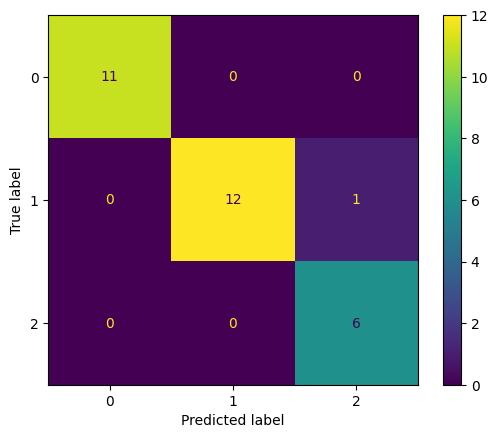

In [15]:
'''
Q35. Train a Random Forest Classifier and visualize the confusion matrix
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)


In [16]:
'''
Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic
Regression, and compare accuracy
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]
stack = StackingClassifier(estimators=estimators,
                           final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
acc = accuracy_score(y_test, stack.predict(X_test))
print(f"Stacking Classifier Accuracy: {acc:.2f}")


Stacking Classifier Accuracy: 0.97


In [17]:
'''
Q37. Train a Random Forest Classifier and print the top 5 most important
features.
'''
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
rf = RandomForestClassifier(random_state=1)
rf.fit(data.data, data.target)
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
print(importances.sort_values(ascending=False).head(5))


worst concave points    0.123350
worst perimeter         0.115661
worst area              0.105248
worst radius            0.102798
mean concave points     0.100735
dtype: float64


In [18]:
'''
Q38. Train a Bagging Classifier and evaluate performance using Precision,
Recall, and F1-score
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10,
                        random_state=1)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9523809523809524
Recall: 0.9743589743589745
F1-score: 0.9610256410256411


In [19]:
'''
Q39. Train a Random Forest Classifier and analyze the effect of max_depth
on accuracy.
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
for depth in [None, 2, 4, 6, 8]:
    rf = RandomForestClassifier(max_depth=depth, random_state=1)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"max_depth={depth}, Accuracy={acc:.2f}")


max_depth=None, Accuracy=0.97
max_depth=2, Accuracy=0.97
max_depth=4, Accuracy=0.97
max_depth=6, Accuracy=0.97
max_depth=8, Accuracy=0.97


In [20]:
'''
Q40. Train a Bagging Regressor using different base estimators (DecisionTree and
KNeighbors) and compare performance
'''
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    bag = BaggingRegressor(base, n_estimators=10, random_state=1)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"{base.__class__.__name__} MSE: {mse:.2f}")


DecisionTreeRegressor MSE: 0.28
KNeighborsRegressor MSE: 1.11


In [21]:
'''
Q41. Train a Random Forest Classifier and evaluate its performance using
ROC-AUC Score
'''
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print(f"ROC-AUC Score: {auc:.2f}")


ROC-AUC Score: 0.98


In [22]:
'''
Q42. Train a Bagging Classifier and evaluate its performance using
cross-validation
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X, y = load_iris(return_X_y=True)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10,
                        random_state=1)
scores = cross_val_score(bag, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean accuracy: 0.9600000000000002


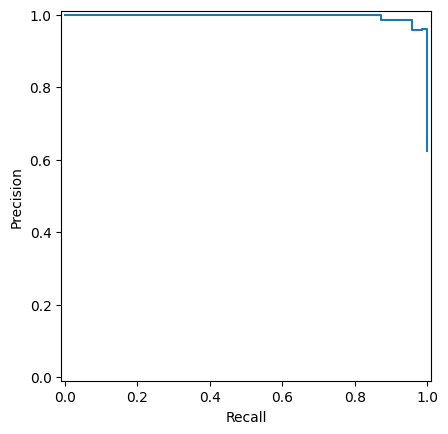

In [23]:
'''
Q43. Train a Random Forest Classifier and plot the Precision-Recall curve
'''

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.show()


In [24]:
'''
Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and
compare accuracy.
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
estimators = [
    ('rf', RandomForestClassifier()),
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
acc = accuracy_score(y_test, stack.predict(X_test))
print(f"Stacking Classifier Accuracy: {acc:.2f}")


Stacking Classifier Accuracy: 0.97


In [25]:
'''
Q45. Train a Bagging Regressor with different levels of bootstrap samples and
compare performance.
'''
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
for max_samples in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                           max_samples=max_samples, random_state=1)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"Bootstrap samples: {max_samples}, MSE: {mse:.2f}")


Bootstrap samples: 0.5, MSE: 0.30
Bootstrap samples: 0.7, MSE: 0.29
Bootstrap samples: 1.0, MSE: 0.28
